In [6]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor as mlp
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
## Data preparation

In [8]:
data= pd.read_csv('^DJI.csv')
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4279,2017-01-05,19924.560547,19948.599609,19811.119141,19899.289063,19899.289063,269920000
4280,2017-01-06,19906.960938,19999.630859,19834.080078,19963.800781,19963.800781,277700000
4281,2017-01-09,19931.410156,19943.779297,19887.380859,19887.380859,19887.380859,287060000
4282,2017-01-10,19876.349609,19957.119141,19836.029297,19855.529297,19855.529297,299410000
4283,2017-01-11,19887.380859,19973.419922,19833.160156,19954.279297,19954.279297,336150000


In [9]:
data= data.dropna(axis=0)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4279,2017-01-05,19924.560547,19948.599609,19811.119141,19899.289063,19899.289063,269920000
4280,2017-01-06,19906.960938,19999.630859,19834.080078,19963.800781,19963.800781,277700000
4281,2017-01-09,19931.410156,19943.779297,19887.380859,19887.380859,19887.380859,287060000
4282,2017-01-10,19876.349609,19957.119141,19836.029297,19855.529297,19855.529297,299410000
4283,2017-01-11,19887.380859,19973.419922,19833.160156,19954.279297,19954.279297,336150000


In [10]:
data= data.values[:, 1:5]
print (data.shape)

(4284, 4)


In [11]:
print (data[:6, :])

[[11501.849609 11522.009766 11305.69043 11357.509766]
 [11349.75 11350.05957 10986.450195 10997.929688]
 [10989.370117 11215.099609 10938.669922 11122.650391]
 [11113.370117 11313.450195 11098.450195 11253.259766]
 [11247.05957 11528.139648 11239.919922 11522.55957]
 [11532.480469 11638.280273 11532.480469 11572.200195]]


In [12]:
y= data[1:, 3]
print (y.shape)
X= data[:4283,:]
print (X.shape)

(4283,)
(4283, 4)


In [13]:
y= (y- min(y))/(max(y)- min(y))

In [14]:
print (y[4270:])
print (y[:7])

[0.9958489671060151 0.9969608353545725 0.9977970638423223
 0.9895037255460575 0.9884685127944293 0.9842101331451283
 0.9930844240922265 0.9975826611512648 0.9943898946924046
 0.9991943173236132 0.9935030473634489 0.9911309455181354
 0.9984852177269742]
[0.3314732377562158 0.34076164281889654 0.3504885987356185
 0.3705443360966607 0.37424125426240135 0.36968941651198045
 0.3726698167615406]


In [15]:
X= (X- np.min(X,axis=0))/(np.max(X, axis=0)-np.min(X,axis=0))
print (X.shape)
print (X[:7, 3])

(4283, 4)
[0.35825247597887355 0.3314732377562158 0.34076164281889654
 0.3504885987356185 0.3705443360966607 0.37424125426240135
 0.36968941651198045]


In [16]:
split = int(0.8*data.shape[0])
X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print ( X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3427, 4) (3427,)
(856, 4) (856,)


In [17]:
## Model fitting and score calculation

In [18]:
model= mlp(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', verbose=True)

In [19]:
model.fit(X_train, y_train)

Iteration 1, loss = 0.02174838
Iteration 2, loss = 0.00410060
Iteration 3, loss = 0.00070638
Iteration 4, loss = 0.00016844
Iteration 5, loss = 0.00009154
Iteration 6, loss = 0.00007372
Iteration 7, loss = 0.00006827
Iteration 8, loss = 0.00006603
Iteration 9, loss = 0.00006400
Iteration 10, loss = 0.00006348
Iteration 11, loss = 0.00006225
Iteration 12, loss = 0.00006165
Iteration 13, loss = 0.00006092
Iteration 14, loss = 0.00006046
Iteration 15, loss = 0.00006031
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [20]:
y_pred= model.predict(X_test)

In [21]:
rmse= (((y_pred - y_test)**2).sum())/y_pred.size
print (rmse)

0.0016504965131930573


In [22]:
## To show how well the trend of y_test has been tracked by y_pred

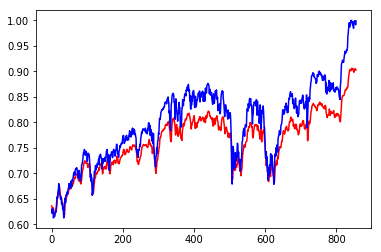

In [23]:
plt.plot(y_pred, 'r-')
plt.plot(y_test, 'b-')
plt.show()

In [24]:
## To show how similar y_pred and y_test are

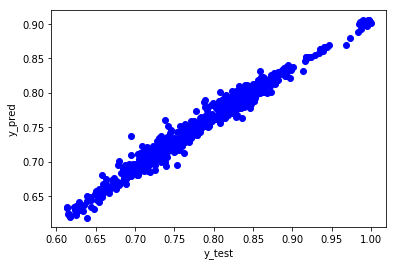

In [25]:
plt.plot(y_test, y_pred, 'bo')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [26]:
model.score(X_test, y_test)

0.7213821381625294

In [27]:
#The score fluctuates between 75 to 85 based on the number of layers and random initialisation